In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data downloaded directly from the OFLC, with a handful of columns dropped (zip codes, etc.)
df = pd.read_excel('H-1B_FY14_Q4.xlsx', converters={'NAIC_CODE':str})

In [3]:
df.head()

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,OFLC ONLINE DATA CENTER,2013.0,ST. LOUIS,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,OFLC ONLINE DATA CENTER,2013.0,INDIANAPOLIS,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,OFLIC ONLINE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330.0
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519504 entries, 0 to 519503
Data columns (total 35 columns):
LCA_CASE_NUMBER                   519504 non-null object
STATUS                            519504 non-null object
LCA_CASE_SUBMIT                   519504 non-null datetime64[ns]
DECISION_DATE                     519504 non-null datetime64[ns]
VISA_CLASS                        519504 non-null object
LCA_CASE_EMPLOYMENT_START_DATE    519500 non-null datetime64[ns]
LCA_CASE_EMPLOYMENT_END_DATE      519499 non-null datetime64[ns]
LCA_CASE_EMPLOYER_NAME            519476 non-null object
LCA_CASE_EMPLOYER_ADDRESS         519462 non-null object
LCA_CASE_EMPLOYER_CITY            519477 non-null object
LCA_CASE_EMPLOYER_STATE           519458 non-null object
LCA_CASE_EMPLOYER_POSTAL_CODE     519463 non-null object
LCA_CASE_SOC_CODE                 519455 non-null object
LCA_CASE_SOC_NAME                 515233 non-null object
LCA_CASE_JOB_TITLE                519497 non-null object
LC

In [6]:
df['TOTAL_WORKERS'].sum()

1012896.0

In [8]:
#filter data to NJ employers only
nj_emp = df[df['LCA_CASE_EMPLOYER_STATE'] == 'NJ']

In [9]:
#automatically calculated columns for all "numerical" data. This is just to get a feel.
nj_emp.describe()

/Users/epetenko/miniconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,LCA_CASE_WAGE_RATE_FROM,LCA_CASE_WAGE_RATE_TO,TOTAL_WORKERS,PW_1,YR_SOURCE_PUB_1,PW_2,LCA_CASE_NAICS_CODE
count,6.731900e+04,6775.000000,67321.000000,6.731800e+04,67319.000000,15593.000000,67321.000000
mean,7.321746e+04,95564.767010,2.106460,6.291827e+04,2013.317800,62541.840323,510655.024807
std,7.782114e+05,42097.679228,4.002383,2.212263e+04,0.550449,19273.936283,117561.077458
min,9.500000e+00,15.000000,1.000000,9.500000e+00,2007.000000,13.090000,1113.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,541511.000000
50%,NaN,NaN,1.000000,NaN,NaN,NaN,541511.000000
75%,NaN,NaN,1.000000,NaN,NaN,NaN,541511.000000
max,2.013139e+08,750000.000000,100.000000,1.888843e+06,2014.000000,655083.000000,926150.000000


In [10]:
#totals for numerical columns. Again, just a quick feel. Noted -- 92,120 total workers for 2017, a drop from 2016.
nj_emp.sum()

LCA_CASE_WAGE_RATE_FROM    4.928926e+09
LCA_CASE_WAGE_RATE_TO      6.474513e+08
TOTAL_WORKERS              1.418090e+05
PW_1                       4.235532e+09
YR_SOURCE_PUB_1            1.355345e+08
PW_2                       9.752149e+08
LCA_CASE_NAICS_CODE        3.437781e+10
dtype: float64

In [27]:
df['LCA_CASE_SUBMIT'].unique()

array(['2013-01-18T18:05:43.000000000', '2014-03-17T11:11:45.000000000',
       '2014-03-14T17:05:01.000000000', ...,
       '2014-09-26T15:57:41.000000000', '2014-09-29T14:15:03.000000000',
       '2014-09-30T19:12:00.000000000'], dtype='datetime64[ns]')

In [11]:
from datetime import datetime

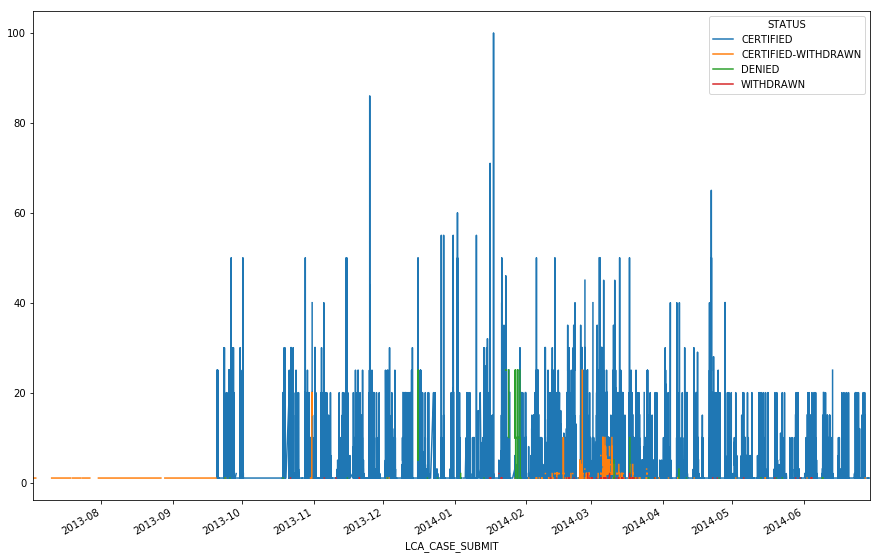

In [14]:
#out of all cases submitted during FY17, what is their status?
nj_emp[(nj_emp['LCA_CASE_SUBMIT']>'2013-06-30')&(nj_emp['LCA_CASE_SUBMIT']<'2014-06-30')].pivot_table(index='LCA_CASE_SUBMIT', columns='STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

In [29]:
nj_emp[(nj_emp['LCA_CASE_SUBMIT']>'2013-06-30')&(nj_emp['LCA_CASE_SUBMIT']<'2014-06-30')].pivot_table(index='LCA_CASE_SUBMIT', columns='STATUS', values='TOTAL_WORKERS', aggfunc=sum)

STATUS,CERTIFIED,CERTIFIED-WITHDRAWN,DENIED,WITHDRAWN
LCA_CASE_SUBMIT,,,,
2013-07-02 12:31:56,NaN,1.0,NaN,NaN
2013-07-03 13:39:05,NaN,1.0,NaN,NaN
2013-07-03 13:47:40,NaN,1.0,NaN,NaN
2013-07-03 13:56:08,NaN,NaN,NaN,10.0
2013-07-03 14:02:12,NaN,1.0,NaN,NaN
2013-07-03 16:44:59,NaN,NaN,NaN,1.0
2013-07-08 10:38:36,NaN,1.0,NaN,NaN
2013-07-09 20:24:38,NaN,NaN,NaN,1.0
2013-07-10 11:04:25,NaN,1.0,NaN,NaN


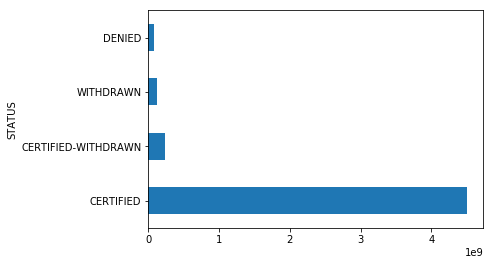

In [15]:
#dividing into status groups.
nj_emp.groupby('STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

In [17]:
#I was curious about the sudden spike in withdrawn applications
#it appears to most be because of one company
nj_emp[nj_emp['STATUS'] == 'CERTIFIED-WITHDRAWN'].groupby('LCA_CASE_EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head()

LCA_CASE_EMPLOYER_NAME
WIPRO LIMITED                               72155883.00
MARLABS, INC                                10840400.00
ORACLE FINANCIAL SERVICES SOFTWARE, INC.     5131672.68
MANASI INFORMATION TECHNOLOGIES INC          4560000.00
LENMAR CONSULTING INC.                       4007621.00
Name: LCA_CASE_WAGE_RATE_FROM, dtype: float64

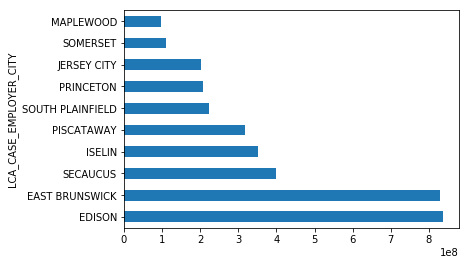

In [18]:
#top cities that employed H1B visa workers
nj_emp.groupby('LCA_CASE_EMPLOYER_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

In [19]:
#The national data filtered down to workers who physically worked in NJ
nj_work = df[df['LCA_CASE_WORKLOC1_STATE'] == 'NJ']

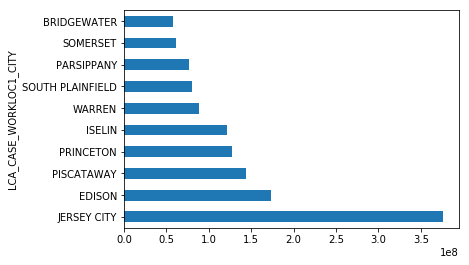

In [20]:
#top cities for H1B visa employees to work in
nj_work.groupby('LCA_CASE_WORKLOC1_CITY').sum().iloc[:,0].sort_values(ascending=False).head(10).plot(kind='barh');

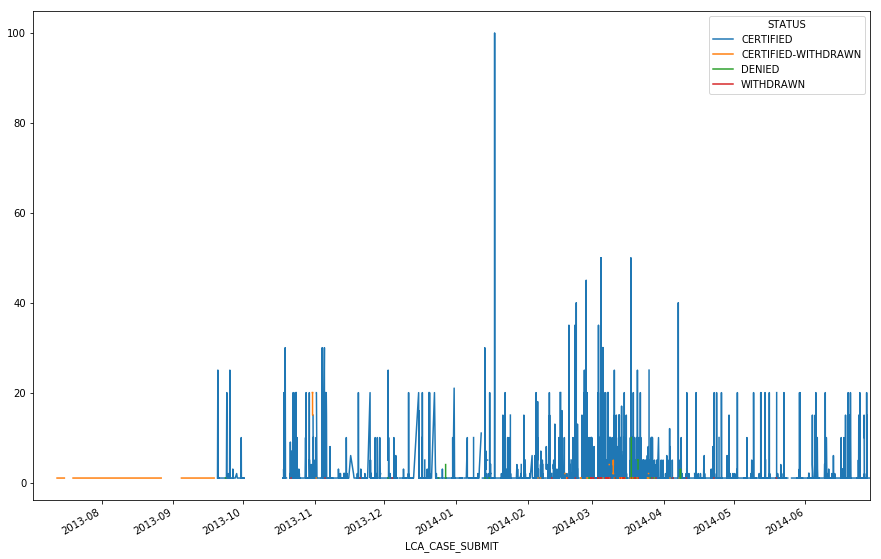

In [21]:
#same as above, but for place of work.
nj_work[(nj_work['LCA_CASE_SUBMIT']>'2013-06-30')&(nj_emp['LCA_CASE_SUBMIT']<'2014-06-30')].pivot_table(index='LCA_CASE_SUBMIT', columns='STATUS', values='TOTAL_WORKERS', aggfunc=sum).plot(figsize=[15,10]);

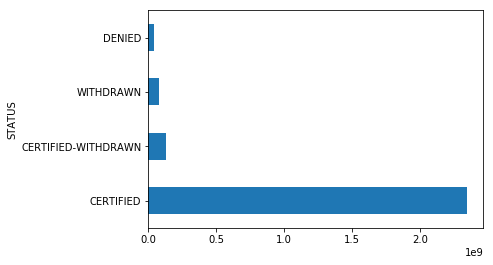

In [22]:
nj_work.groupby('STATUS').sum().iloc[:,0].sort_values(ascending=False).plot(kind='barh');

In [26]:
nj_emp.pivot_table(index='LCA_CASE_EMPLOYMENT_START_DATE', values='TOTAL WORKERS', aggfunc=sum).plot(figsize=[15,10]);

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
nj_emp.groupby('EMPLOYER_NAME').sum().iloc[:,0].sort_values(ascending=False).head(10)